In [292]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso, HuberRegressor, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
import lightgbm as lgb
np.random.seed(25)

In [293]:
train9 = pd.read_csv('train_dir/train9.csv')
test9 = pd.read_csv('test_dir/test9.csv')

train1 = pd.read_csv('train_dir/train1.csv')
test1 = pd.read_csv('test_dir/test1.csv')

data = pd.read_csv('train_dir/hero_data.csv')

In [294]:
train1.head(10)

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,41,1_41,201,125,3731.707317
1,2,17,2_17,427,234,2922.058381
2,5,106,5_106,240,130,5116.682739
3,6,65,6_65,206,122,4131.553861
4,7,69,7_69,697,382,2474.469306
5,8,39,8_39,306,167,4632.573290
6,11,7,11_7,258,149,2990.055249
7,12,62,12_62,367,205,3390.995261
8,13,62,13_62,180,97,3423.442450
9,14,32,14_32,410,237,3482.988166


In [295]:
# Merge train1 and train9 based on user_id and then merge data from hero_data

train = train9.append(train1)
train = train.append(test9)
train = train.sort_values('user_id')
train = pd.merge(train, data, how='left', on='hero_id')

In [296]:
# Merge test1 and test9 based on user_id and then merge data from hero_data

# test = test9.append(test1)
# test = test.sort_values('user_id')
test = test1
test = pd.merge(test, data, how='left', on='hero_id')


In [297]:
train.isnull().sum(axis=0)

user_id                  0
hero_id                  0
id                       0
num_games                0
num_wins                 0
kda_ratio                0
primary_attr             0
attack_type              0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
move_speed               0
turn_rate                0
dtype: int64

In [298]:
test.isnull().sum(axis=0)

user_id                  0
hero_id                  0
id                       0
num_games                0
primary_attr             0
attack_type              0
roles                    0
base_health              0
base_health_regen        0
base_mana                0
base_mana_regen          0
base_armor               0
base_magic_resistance    0
base_attack_min          0
base_attack_max          0
base_strength            0
base_agility             0
base_intelligence        0
strength_gain            0
agility_gain             0
intelligence_gain        0
attack_range             0
projectile_speed         0
attack_rate              0
move_speed               0
turn_rate                0
dtype: int64

In [299]:
# fill null values
#test['num_wins'] = test['num_wins'].fillna(test['num_wins'].median())

In [300]:
train.dtypes

user_id                    int64
hero_id                    int64
id                        object
num_games                  int64
num_wins                   int64
kda_ratio                float64
primary_attr              object
attack_type               object
roles                     object
base_health                int64
base_health_regen        float64
base_mana                  int64
base_mana_regen          float64
base_armor               float64
base_magic_resistance      int64
base_attack_min            int64
base_attack_max            int64
base_strength              int64
base_agility               int64
base_intelligence          int64
strength_gain            float64
agility_gain             float64
intelligence_gain        float64
attack_range               int64
projectile_speed           int64
attack_rate              float64
move_speed                 int64
turn_rate                float64
dtype: object

In [301]:
train.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio,primary_attr,attack_type,roles,base_health,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,74,1_74,304,185,3743.699732,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,...,14,16,2.2,1.9,4.0,600,900,1.7,280,0.5
1,1,65,1_65,255,151,4009.021513,int,Ranged,Initiator:Jungler:Disabler:Escape,200,...,15,24,2.7,1.5,2.5,375,900,1.7,290,1.0
2,1,39,1_39,203,135,5094.621514,int,Ranged,Carry:Nuker:Escape,200,...,18,24,2.0,2.0,2.5,550,1500,1.5,295,0.5
3,1,106,1_106,158,106,4619.212963,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,...,22,20,2.1,1.8,1.8,150,900,1.7,305,0.5
4,1,2,1_2,157,94,2871.627907,str,Melee,Initiator:Durable:Disabler:Jungler,200,...,20,18,2.8,2.2,1.6,150,900,1.7,290,0.6


# Visualization

### 1. num_games

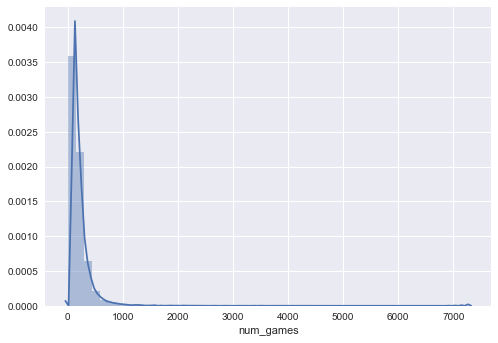

In [302]:
sns.distplot(train['num_games'])

### 2. kda_ratio

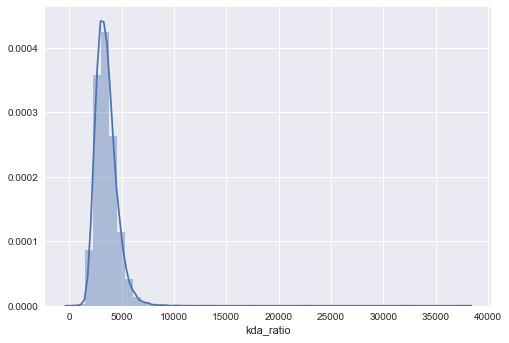

In [303]:
sns.distplot(train['kda_ratio'])

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


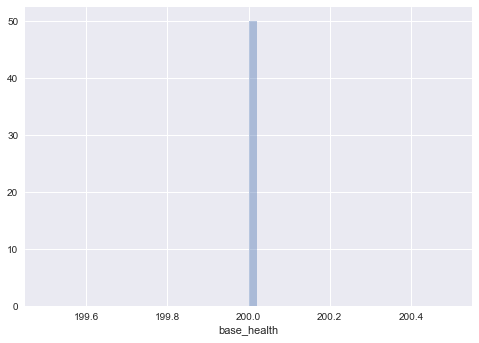

In [304]:
sns.distplot(train['base_health'])   #Same for all heros

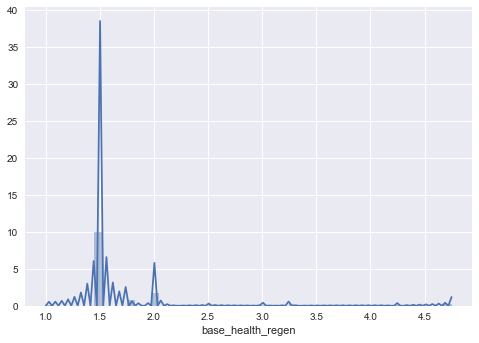

In [305]:
sns.distplot(train['base_health_regen'])

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


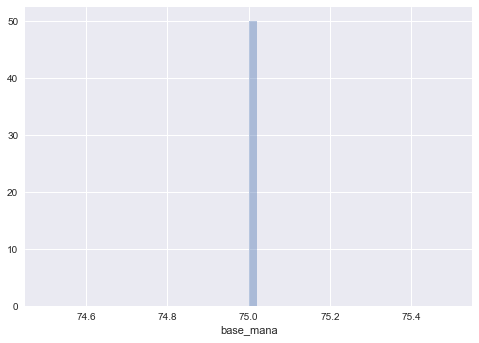

In [306]:
sns.distplot(train['base_mana'])   #Same for all heros

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


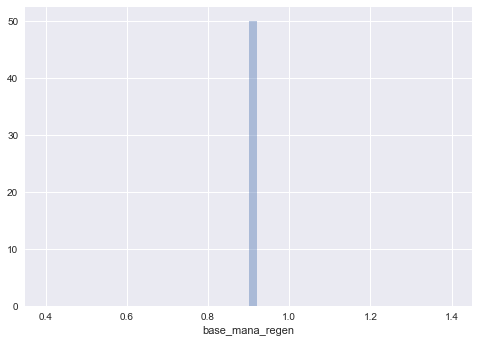

In [307]:
sns.distplot(train['base_mana_regen'])   # same for all

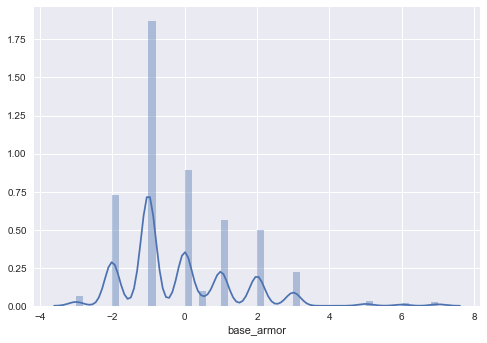

In [308]:
sns.distplot(train['base_armor'])

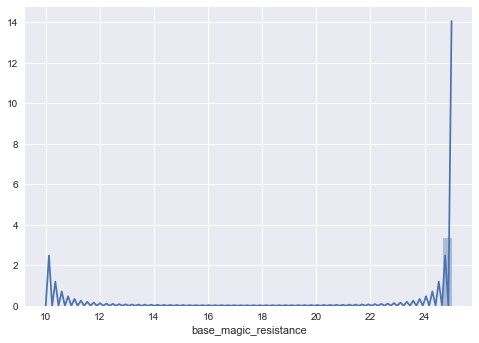

In [309]:
sns.distplot(train['base_magic_resistance'])

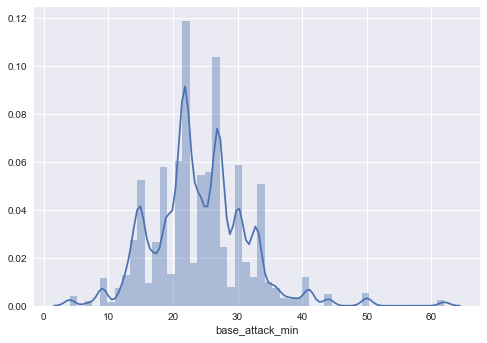

In [310]:
sns.distplot(train['base_attack_min'])

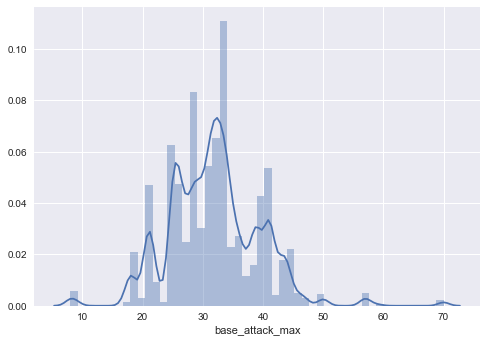

In [311]:
sns.distplot(train['base_attack_max'])

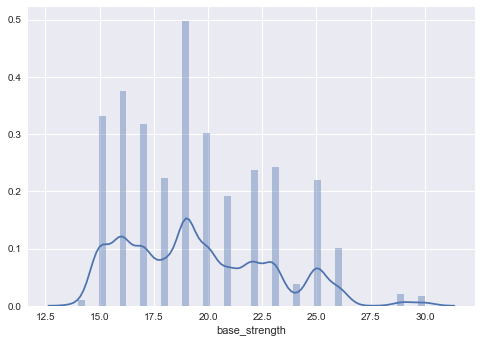

In [312]:
sns.distplot(train['base_strength'])

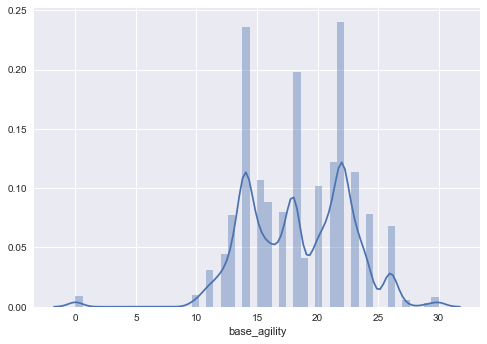

In [313]:
sns.distplot(train['base_agility'])

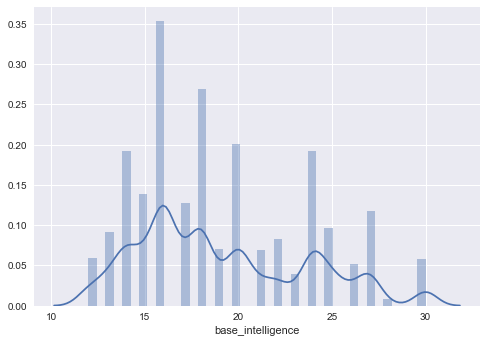

In [314]:
sns.distplot(train['base_intelligence'])

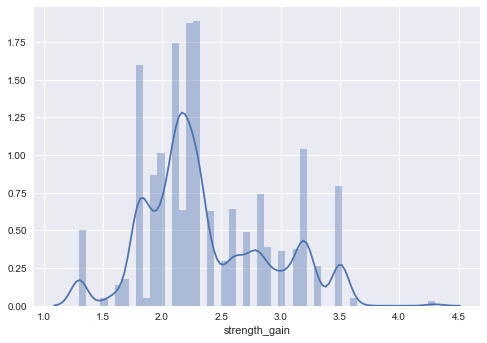

In [315]:
sns.distplot(train['strength_gain'])

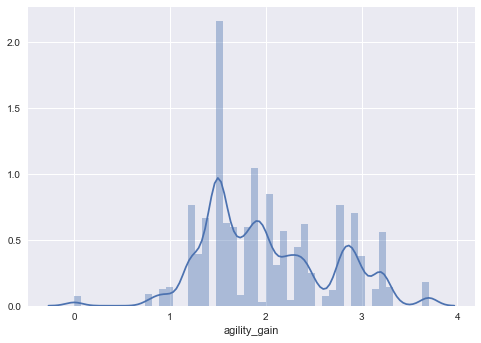

In [316]:
sns.distplot(train['agility_gain'])

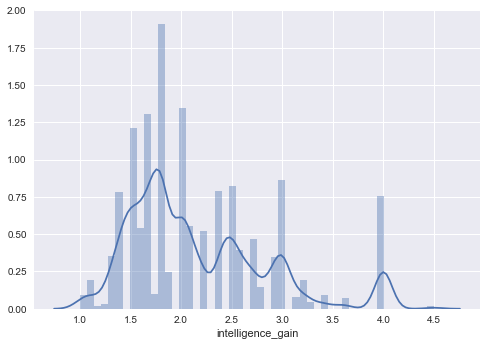

In [317]:
sns.distplot(train['intelligence_gain'])

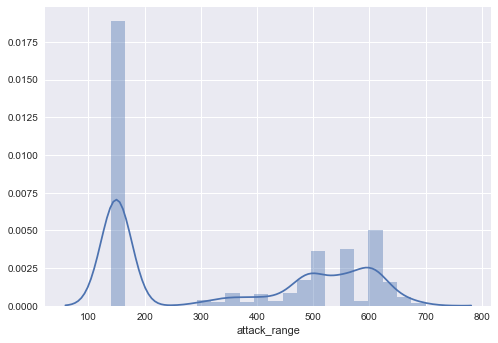

In [318]:
sns.distplot(train['attack_range'])

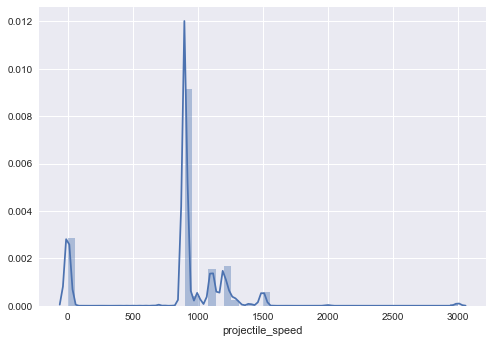

In [319]:
sns.distplot(train['projectile_speed'])

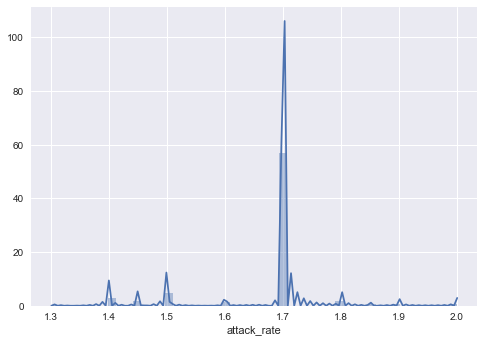

In [320]:
sns.distplot(train['attack_rate'])

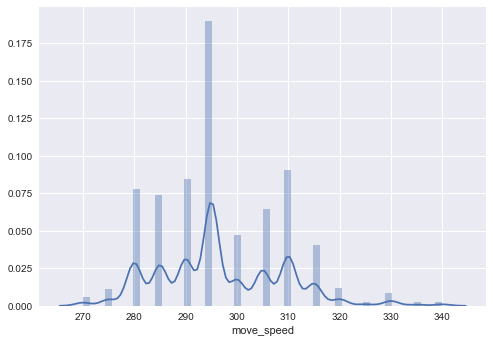

In [321]:
sns.distplot(train['move_speed'])

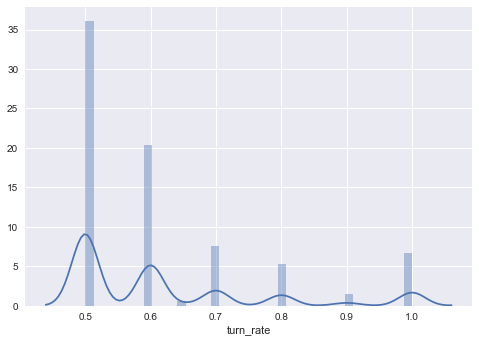

In [322]:
sns.distplot(train['turn_rate'])

# Target relationship with numerical variables

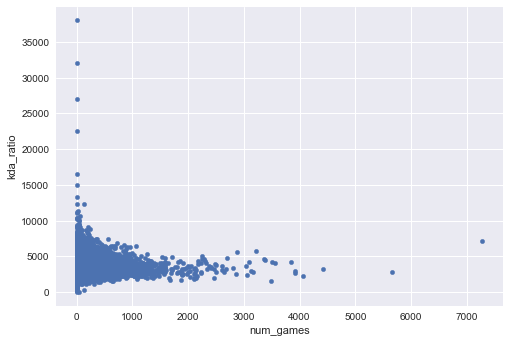

In [323]:
#scatter plot 
var = 'num_games'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

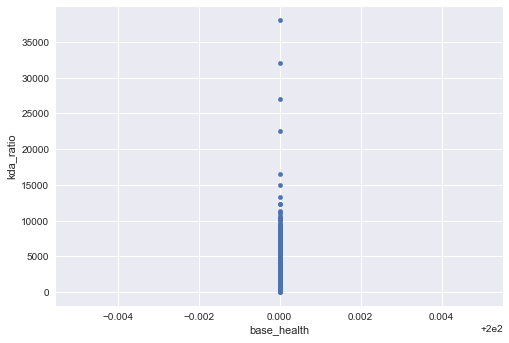

In [324]:
#scatter plot 
var = 'base_health'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

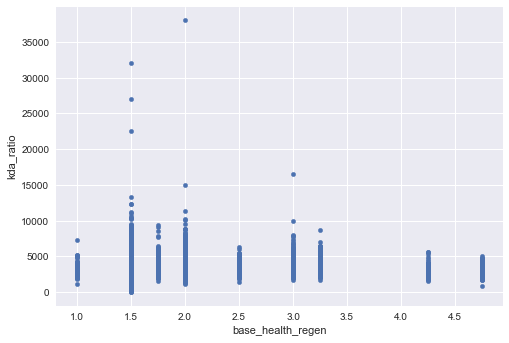

In [325]:
#scatter plot 
var = 'base_health_regen'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

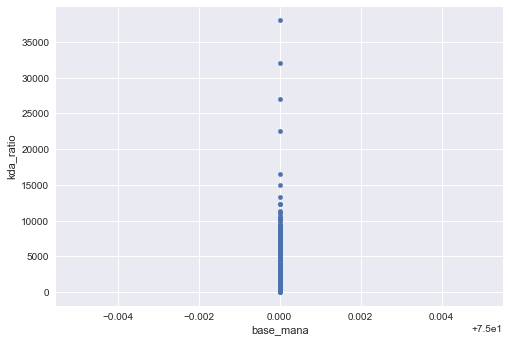

In [326]:
#scatter plot 
var = 'base_mana'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

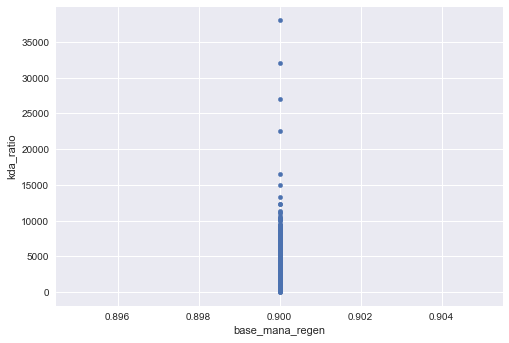

In [327]:
#scatter plot 
var = 'base_mana_regen'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

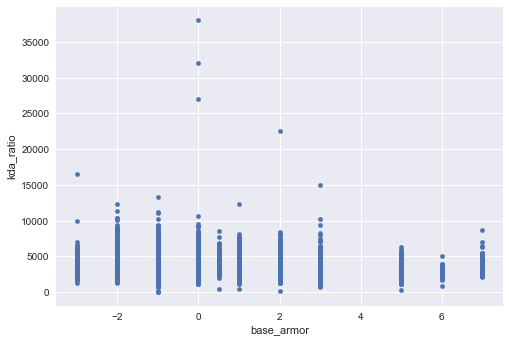

In [328]:
#scatter plot 
var = 'base_armor'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

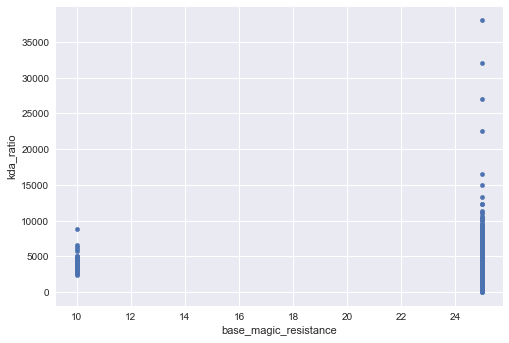

In [329]:
#scatter plot 
var = 'base_magic_resistance'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

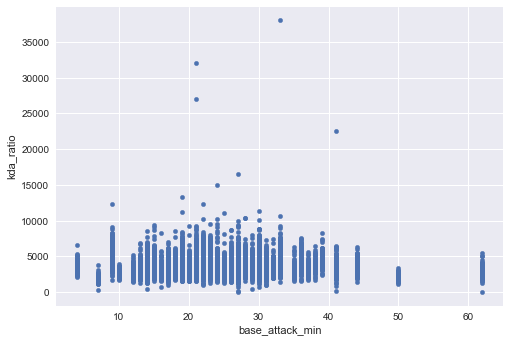

In [330]:
#scatter plot 
var = 'base_attack_min'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

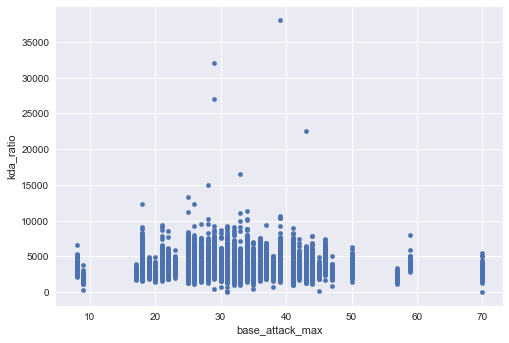

In [331]:
#scatter plot 
var = 'base_attack_max'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

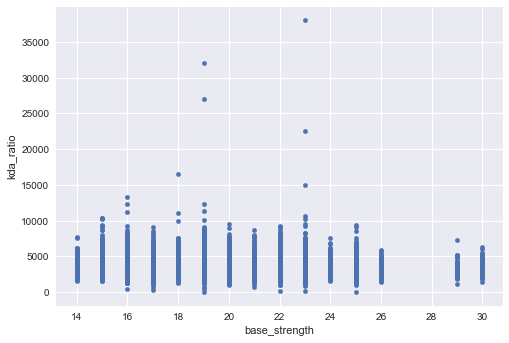

In [332]:
#scatter plot 
var = 'base_strength'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

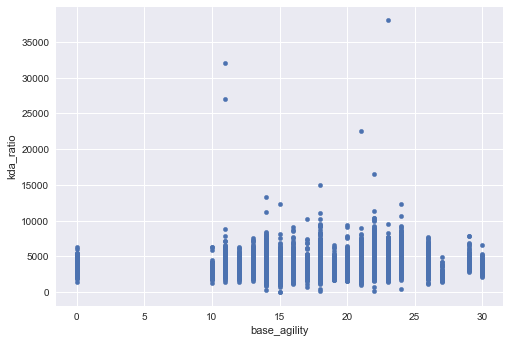

In [333]:
#scatter plot 
var = 'base_agility'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

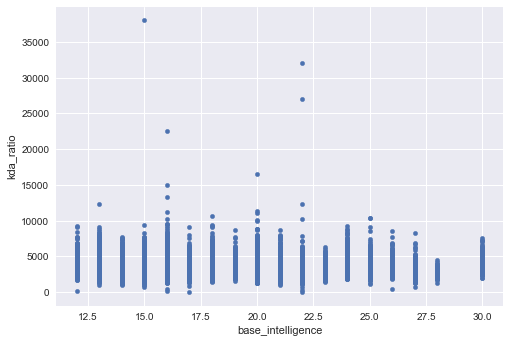

In [334]:
#scatter plot 
var = 'base_intelligence'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

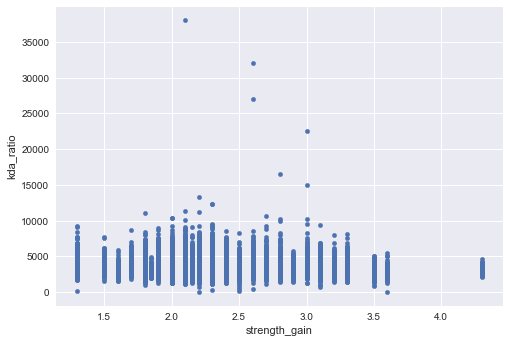

In [335]:
#scatter plot 
var = 'strength_gain'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

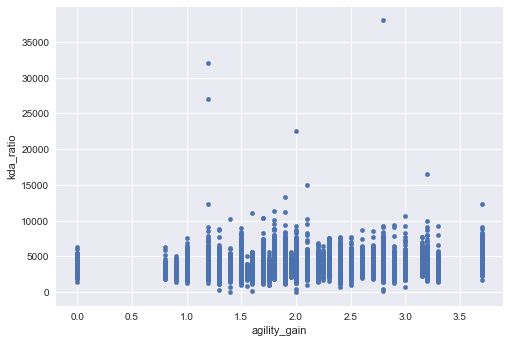

In [336]:
#scatter plot 
var = 'agility_gain'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

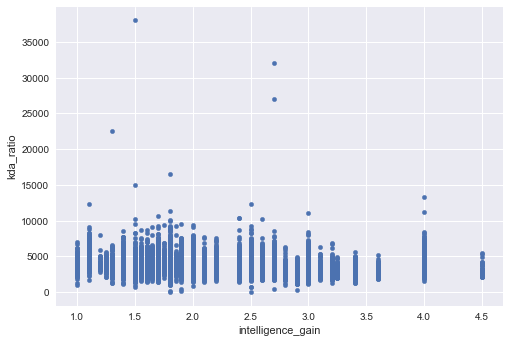

In [337]:
#scatter plot 
var = 'intelligence_gain'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

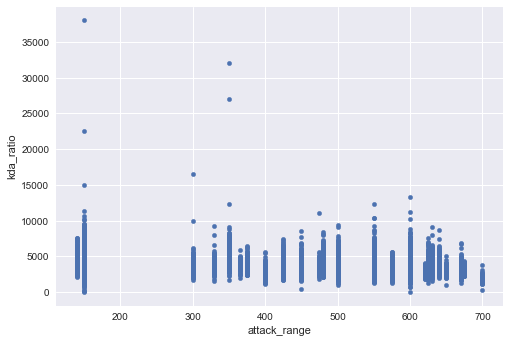

In [338]:
#scatter plot 
var = 'attack_range'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

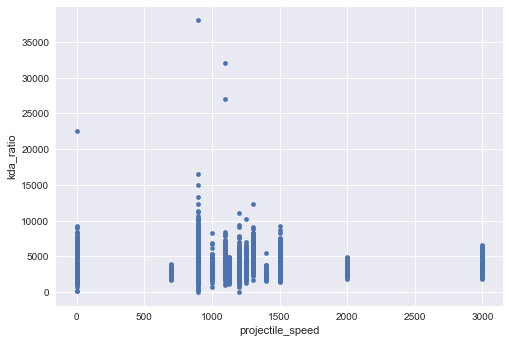

In [339]:
#scatter plot 
var = 'projectile_speed'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

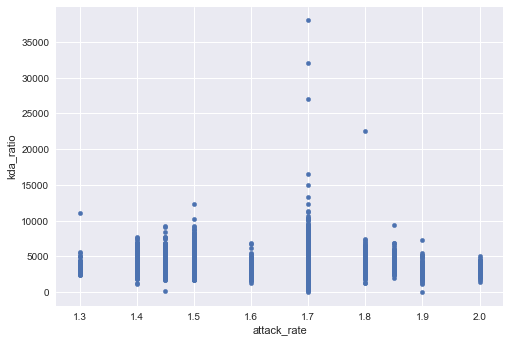

In [340]:
#scatter plot 
var = 'attack_rate'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

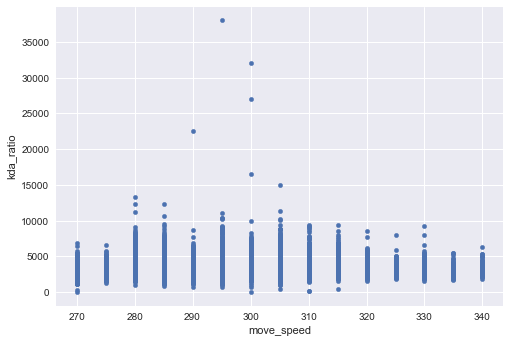

In [341]:
#scatter plot 
var = 'move_speed'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

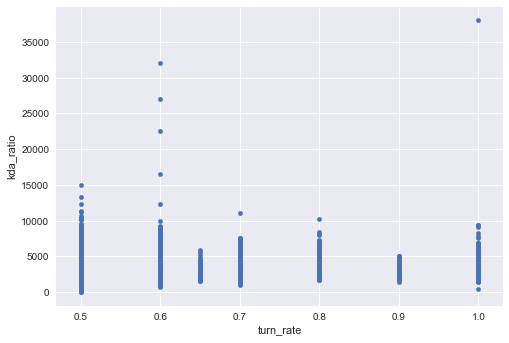

In [342]:
#scatter plot 
var = 'turn_rate'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
data.plot.scatter(x=var, y='kda_ratio');

In [343]:
train.dtypes

user_id                    int64
hero_id                    int64
id                        object
num_games                  int64
num_wins                   int64
kda_ratio                float64
primary_attr              object
attack_type               object
roles                     object
base_health                int64
base_health_regen        float64
base_mana                  int64
base_mana_regen          float64
base_armor               float64
base_magic_resistance      int64
base_attack_min            int64
base_attack_max            int64
base_strength              int64
base_agility               int64
base_intelligence          int64
strength_gain            float64
agility_gain             float64
intelligence_gain        float64
attack_range               int64
projectile_speed           int64
attack_rate              float64
move_speed                 int64
turn_rate                float64
dtype: object

# Target relationship with categorical features

In [344]:
train['primary_attr'].value_counts()

agi    11513
int    10513
str     6996
Name: primary_attr, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


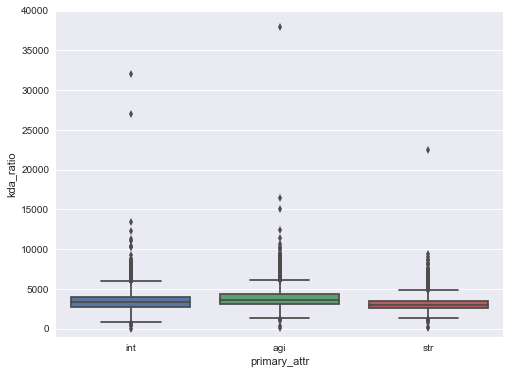

In [345]:
#box plot 
var = 'primary_attr'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [346]:
train['attack_type'].value_counts()

Ranged    15400
Melee     13622
Name: attack_type, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


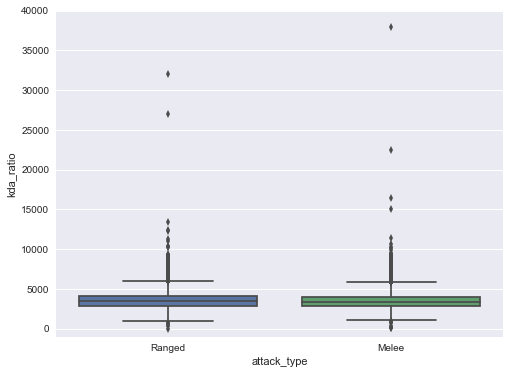

In [347]:
#box plot 
var = 'attack_type'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [348]:
train['roles'].value_counts()

Carry:Nuker                                       1530
Carry:Nuker:Disabler:Escape:Pusher                1529
Carry:Escape:Nuker:Initiator:Disabler             1173
Carry:Pusher:Escape                               1078
Carry:Escape                                      1045
Carry:Escape:Disabler:Nuker                       1027
Disabler:Initiator:Durable:Nuker                   993
Carry:Disabler:Initiator:Durable:Nuker             978
Carry:Nuker:Pusher                                 972
Carry:Nuker:Escape                                 874
Carry:Escape:Nuker                                 860
Carry:Escape:Nuker:Disabler:Initiator              834
Support:Disabler:Nuker                             807
Carry:Support:Escape:Nuker:Disabler                757
Carry:Nuker:Disabler                               595
Support:Initiator:Disabler:Nuker                   534
Carry:Support:Disabler:Escape:Nuker                513
Initiator:Disabler:Escape:Nuker                    462
Carry:Init

In [349]:
def split_roles(text):
    try: 
        x = text.split(":")
        if len(x) == 6:
            return x
        else:
            for i in range(6-len(x)):
                x.append("No Label")
            return x
    except: 
        return ("No Label", "No Label", "No Label", "No Label", "No Label", "No Label")

In [350]:
train['role_1'], train['role_2'], train['role_3'], train['role_4'], train['role_5'], train['role_6'] = \
zip(*train['roles'].apply(lambda x: split_roles(x)))

test['role_1'], test['role_2'], test['role_3'], test['role_4'], test['role_5'], test['role_6'] = \
zip(*test['roles'].apply(lambda x: split_roles(x)))

train.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio,primary_attr,attack_type,roles,base_health,...,projectile_speed,attack_rate,move_speed,turn_rate,role_1,role_2,role_3,role_4,role_5,role_6
0,1,74,1_74,304,185,3743.699732,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,...,900,1.7,280,0.5,Carry,Nuker,Disabler,Escape,Pusher,No Label
1,1,65,1_65,255,151,4009.021513,int,Ranged,Initiator:Jungler:Disabler:Escape,200,...,900,1.7,290,1.0,Initiator,Jungler,Disabler,Escape,No Label,No Label
2,1,39,1_39,203,135,5094.621514,int,Ranged,Carry:Nuker:Escape,200,...,1500,1.5,295,0.5,Carry,Nuker,Escape,No Label,No Label,No Label
3,1,106,1_106,158,106,4619.212963,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,...,900,1.7,305,0.5,Carry,Escape,Nuker,Disabler,Initiator,No Label
4,1,2,1_2,157,94,2871.627907,str,Melee,Initiator:Durable:Disabler:Jungler,200,...,900,1.7,290,0.6,Initiator,Durable,Disabler,Jungler,No Label,No Label


In [351]:
train['role_1'].value_counts()

Carry        19417
Support       4440
Initiator     2211
Disabler      1438
Nuker         1077
Escape         388
Durable         51
Name: role_1, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


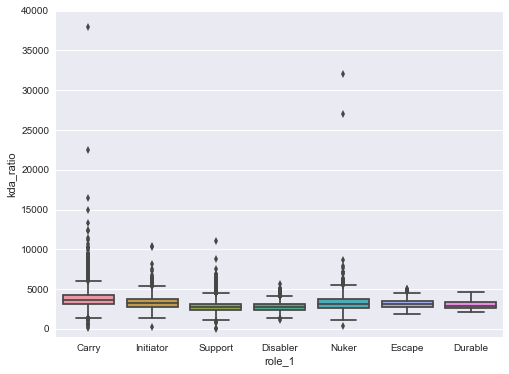

In [352]:
#box plot 
var = 'role_1'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [353]:
train['role_2'].value_counts()

Nuker        7704
Escape       6747
Disabler     4545
Initiator    2581
Pusher       1994
Support      1964
Durable      1703
Jungler      1158
Carry         446
No Label      180
Name: role_2, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


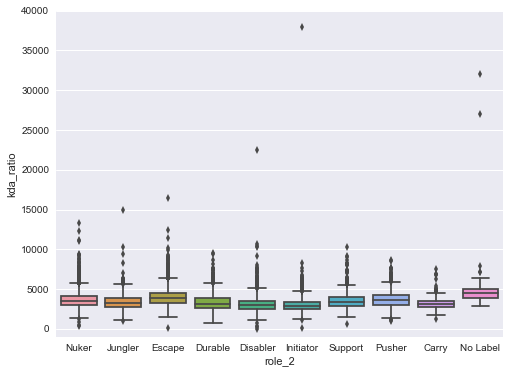

In [354]:
#box plot 
var = 'role_2'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [355]:
train['role_3'].value_counts()

Disabler     7612
Nuker        6197
Escape       3881
No Label     3343
Durable      3082
Pusher       2126
Initiator    2124
Jungler       657
Name: role_3, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


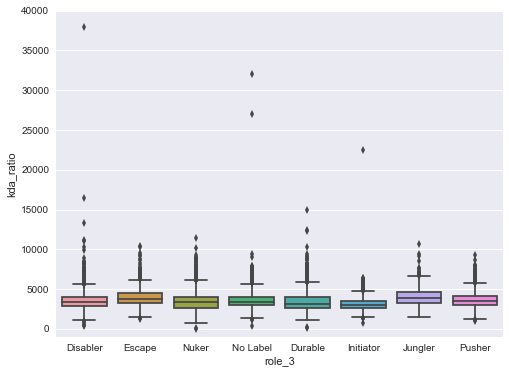

In [356]:
#box plot 
var = 'role_3'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [357]:
train['role_4'].value_counts()

No Label     10640
Nuker         5513
Escape        4324
Disabler      3139
Initiator     2585
Durable       2004
Jungler        463
Pusher         354
Name: role_4, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


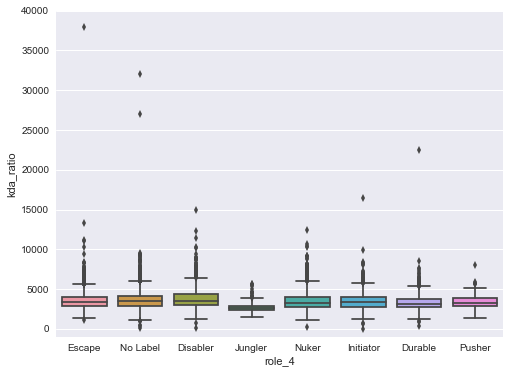

In [358]:
#box plot 
var = 'role_4'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [359]:
train['role_5'].value_counts()

No Label     18157
Disabler      2895
Nuker         2194
Initiator     2103
Pusher        1613
Durable       1025
Escape         786
Jungler        249
Name: role_5, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


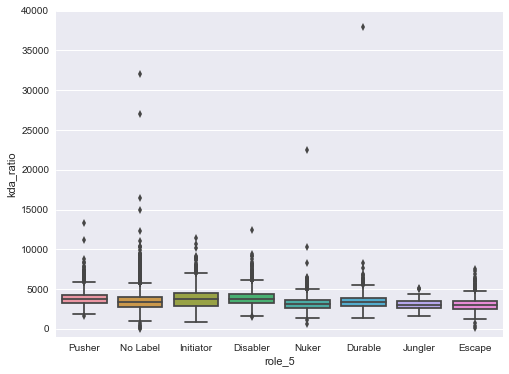

In [360]:
#box plot 
var = 'role_5'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

In [361]:
train['role_6'].value_counts()

No Label     28207
Nuker          315
Pusher         240
Disabler       164
Initiator       71
Escape          25
Name: role_6, dtype: int64

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


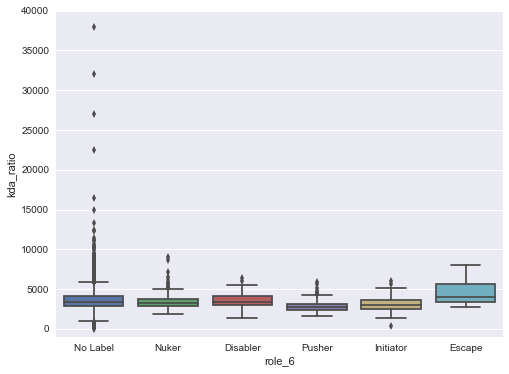

In [362]:
#box plot
var = 'role_6'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-1000, ymax=40000);

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


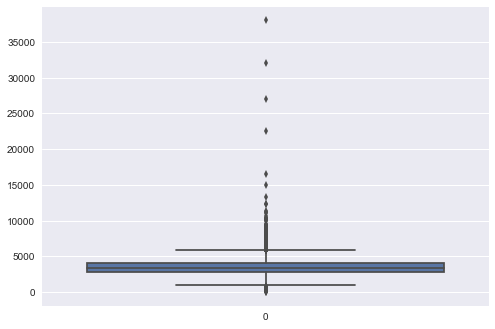

In [363]:
sns.boxplot(data=train.kda_ratio)

# Correlation Matrix

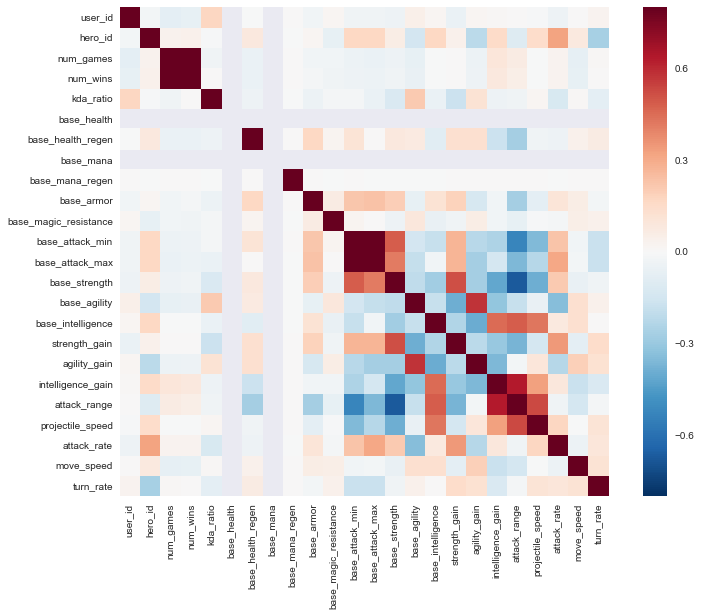

In [364]:
#correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [365]:
print(corr['kda_ratio'].sort_values(ascending=False))#top 15 values
print("=====================================================")
print(corr['kda_ratio'].sort_values(ascending=False)[-5:])#last 5

kda_ratio                1.000000e+00
base_agility             2.077327e-01
user_id                  1.691162e-01
agility_gain             1.181483e-01
projectile_speed         1.338872e-02
move_speed               8.790895e-03
num_wins                 4.491923e-03
base_mana_regen         -1.318232e-14
hero_id                 -8.548131e-03
base_attack_min         -1.697960e-02
base_magic_resistance   -1.771073e-02
attack_range            -3.179936e-02
num_games               -3.641545e-02
base_health_regen       -4.156321e-02
intelligence_gain       -4.206291e-02
base_armor              -4.380906e-02
base_intelligence       -5.039264e-02
base_attack_max         -5.497437e-02
turn_rate               -8.035490e-02
base_strength           -1.247880e-01
attack_rate             -1.287908e-01
strength_gain           -1.689123e-01
base_health                       NaN
base_mana                         NaN
Name: kda_ratio, dtype: float64
base_strength   -0.124788
attack_rate     -0.128791
stre

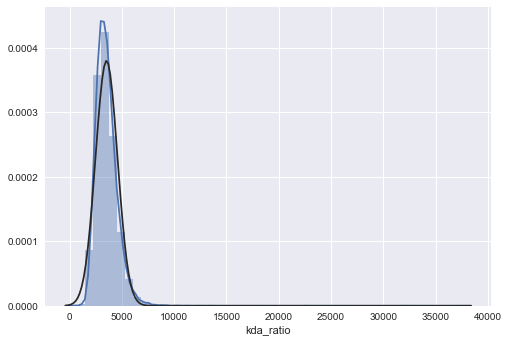

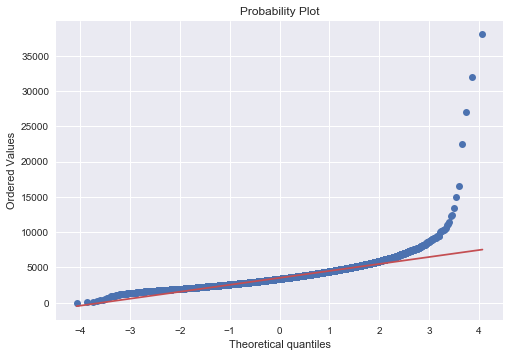

In [366]:
from scipy.stats import norm
from scipy import stats

#histogram and normal probability plot
sns.distplot(train['kda_ratio'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['kda_ratio'], plot=plt)

In [367]:
train = train[train['kda_ratio']>0]

In [368]:
# #applying log transformation
# train['kda_ratio'] = np.log(train['kda_ratio'])

# sns.distplot(train['kda_ratio'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train['kda_ratio'], plot=plt)

In [369]:
# Outliers removal
train = train[train['kda_ratio']<15000]

In [370]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 24 numeric and 10 categorical columns in train data


In [371]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['kda_ratio'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['kda_ratio'] = train.kda_ratio.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

In [372]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
train["role_3"] = lb_enc.fit_transform(train["role_3"])
train["role_4"] = lb_enc.fit_transform(train["role_4"])
train["role_6"] = lb_enc.fit_transform(train["role_6"])

test["role_3"] = lb_enc.fit_transform(test["role_3"])
test["role_4"] = lb_enc.fit_transform(test["role_4"])
test["role_6"] = lb_enc.fit_transform(test["role_6"])

In [373]:
train.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio,primary_attr,attack_type,roles,base_health,...,projectile_speed,attack_rate,move_speed,turn_rate,role_1,role_2,role_3,role_4,role_5,role_6
0,1,74,1_74,304,185,3743.699732,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,...,900,1.7,280,0.5,Carry,Nuker,0,2,Pusher,3
1,1,65,1_65,255,151,4009.021513,int,Ranged,Initiator:Jungler:Disabler:Escape,200,...,900,1.7,290,1.0,Initiator,Jungler,0,2,No Label,3
2,1,39,1_39,203,135,5094.621514,int,Ranged,Carry:Nuker:Escape,200,...,1500,1.5,295,0.5,Carry,Nuker,2,5,No Label,3
3,1,106,1_106,158,106,4619.212963,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,...,900,1.7,305,0.5,Carry,Escape,6,0,Initiator,3
4,1,2,1_2,157,94,2871.627907,str,Melee,Initiator:Durable:Disabler:Jungler,200,...,900,1.7,290,0.6,Initiator,Durable,0,4,No Label,3


In [375]:
train.shape

(29015, 34)

In [376]:
feature_names = [x for x in train.columns if x not in ['hero_id', 'id', 'kda_ratio', 'user_id',
                                                       'num_wins','base_health','base_mana',
                                                       'roles','primary_attr','role_1','role_2',
                                                      'role_5','attack_type']]
target = train['kda_ratio']

# Model

In [381]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[feature_names], target, test_size = 0.1, random_state = 0)

In [384]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [403]:
feature_names

['num_games',
 'base_health_regen',
 'base_mana_regen',
 'base_armor',
 'base_magic_resistance',
 'base_attack_min',
 'base_attack_max',
 'base_strength',
 'base_agility',
 'base_intelligence',
 'strength_gain',
 'agility_gain',
 'intelligence_gain',
 'attack_range',
 'projectile_speed',
 'attack_rate',
 'move_speed',
 'turn_rate',
 'role_3',
 'role_4',
 'role_6']

In [404]:
## BEST MODEL

from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=500, depth=3, learning_rate=0.01, loss_function='RMSE', verbose= True)
model.fit(train[feature_names], target, cat_features = [18,19,20])
pred_cat = model.predict(test[feature_names])
pred_cat[:10]

Borders generated
0:	learn 3630.668858passed: 0.113 sec	total: 175ms	remaining: 4m 22s
1:	learn 3596.943446passed: 0.0268 sec	total: 203ms	remaining: 2m 31s
2:	learn 3563.473133passed: 0.0778 sec	total: 281ms	remaining: 2m 20s
3:	learn 3530.596639passed: 0.0207 sec	total: 303ms	remaining: 1m 53s
4:	learn 3498.007791passed: 0.0744 sec	total: 378ms	remaining: 1m 52s
5:	learn 3465.689518passed: 0.0437 sec	total: 422ms	remaining: 1m 45s
6:	learn 3433.755184passed: 0.0437 sec	total: 466ms	remaining: 1m 39s
7:	learn 3402.277674passed: 0.0208 sec	total: 488ms	remaining: 1m 30s
8:	learn 3371.13068passed: 0.021 sec	total: 509ms	remaining: 1m 24s
9:	learn 3340.190596passed: 0.0542 sec	total: 564ms	remaining: 1m 24s
10:	learn 3309.730607passed: 0.0214 sec	total: 586ms	remaining: 1m 19s
11:	learn 3279.403861passed: 0.0688 sec	total: 656ms	remaining: 1m 21s
12:	learn 3249.477317passed: 0.076 sec	total: 732ms	remaining: 1m 23s
13:	learn 3219.705769passed: 0.0534 sec	total: 787ms	remaining: 1m 23s
14

array([ 2709.88860531,  3059.30526583,  3057.46811565,  3325.78080273,
        3222.28286391,  2912.23209953,  3338.20924071,  3067.68367567,
        2668.49437221,  3225.50100621])

In [405]:
# from xgboost import XGBRegressor
# model = XGBRegressor(colsample_bytree=0.2,
#                        gamma=0.0,
#                        learning_rate=0.05,
#                        max_depth=3,
#                        min_child_weight=1.5,
#                        n_estimators=1000000,#50,000
#                        reg_alpha=0.3,
#                        reg_lambda=0.6,
#                        subsample=0.8,
#                        seed=42,
#                        silent=1)
# model.fit(train[feature_names], target)
# pred_xgb = model.predict(test[feature_names])
# pred_xgb[:10]

array([ 3733.42504883,  4217.72851562,  2871.34790039,  3656.08056641,
        3499.2565918 ,  3125.8671875 ,  4006.17797852,  3923.96923828,
        3806.65356445,  3057.50463867], dtype=float32)

In [406]:
# y_pred = model.predict(X_test)
# print("XGBoost score on test set: ", rmse(y_test, y_pred))

XGBoost score on test set:  609.9570601


In [65]:
# model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
# model.fit(train[feature_names], target)
# pred_rf = model.predict(test[feature_names])
# pred_rf[:10]

array([ 2861.58051622,  3831.64476136,  3201.72802703,  3975.04382022,
        3804.13226914,  3061.34014168,  3862.96587112,  3532.03835857,
        3120.77510573,  3587.78947104])

In [380]:
# from sklearn.svm import SVR
# model = SVR(kernel = 'rbf')
# model.fit(train[feature_names], target)
# pred_svr = model.predict(test[feature_names])
# pred_svr[:10]

array([ 3392.26688741,  3415.56533374,  3394.91263153,  3397.07753185,
        3401.01791452,  3394.93343912,  3416.04947076,  3397.75142105,
        3388.75059759,  3396.76660836])

In [382]:
# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# # specify your configurations as a dict
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': {'l2', 'rms'},
#     'num_leaves': 1000,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# print('Start training...')
# # train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=500,
#                 valid_sets=lgb_eval)

Start training...
[1]	valid_0's l2: 995841
[2]	valid_0's l2: 966365
[3]	valid_0's l2: 937814
[4]	valid_0's l2: 912325
[5]	valid_0's l2: 890160
[6]	valid_0's l2: 869434
[7]	valid_0's l2: 850587
[8]	valid_0's l2: 833701
[9]	valid_0's l2: 818730
[10]	valid_0's l2: 805601
[11]	valid_0's l2: 792724
[12]	valid_0's l2: 781788
[13]	valid_0's l2: 772392
[14]	valid_0's l2: 763036
[15]	valid_0's l2: 755427
[16]	valid_0's l2: 748502
[17]	valid_0's l2: 741559
[18]	valid_0's l2: 735636
[19]	valid_0's l2: 730599
[20]	valid_0's l2: 725647
[21]	valid_0's l2: 721945
[22]	valid_0's l2: 718172
[23]	valid_0's l2: 715393
[24]	valid_0's l2: 712325
[25]	valid_0's l2: 710275
[26]	valid_0's l2: 707732
[27]	valid_0's l2: 705352
[28]	valid_0's l2: 703129
[29]	valid_0's l2: 701243
[30]	valid_0's l2: 699591
[31]	valid_0's l2: 698221
[32]	valid_0's l2: 696881
[33]	valid_0's l2: 695835
[34]	valid_0's l2: 694936
[35]	valid_0's l2: 694013
[36]	valid_0's l2: 693013
[37]	valid_0's l2: 692627
[38]	valid_0's l2: 691902
[39

In [385]:
# pred_gbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# print("LightGMB on test set: ", rmse(y_test, pred_gbm))

LightGMB on test set:  903.057379523


In [386]:
# pred_gbm = gbm.predict(test[feature_names], num_iteration=gbm.best_iteration)

In [396]:
# pred = (pred_xgb + pred_cat + pred_gbm)/3
# pred[:10]

array([ 2839.84540761,  3906.48220529,  3168.13216041,  4160.9833035 ,
        3922.79934641,  3123.42601178,  4140.43194772,  3646.23096539,
        3086.0707307 ,  3626.56468965])

In [54]:
#test['kda_ratio'] = pred
#temp = test[pd.isnull(test['num_wins'])][test.columns]

In [407]:
## make submission
sub = pd.DataFrame()
sub['id'] = test1['id']
sub['kda_ratio'] = pred_cat #temp['kda_ratio'].values
sub.to_csv('result.csv', index=False)

In [408]:
sub.head()

,id,kda_ratio
0,3_53,3733.425049
1,4_17,4217.728516
2,9_51,2871.347900
3,10_54,3656.080566
4,15_74,3499.256592
